In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [ ]:
data_original = pd.read_csv('../data/TBI PUD 10-08-2013.csv')

In [3]:
import data_cleaning

In [4]:
data = data_cleaning.exclude_rows(data_original)
data = data_cleaning.drop_unrelated_features(data)
data = data_cleaning.drop_repetitive_features(data)
data = data_cleaning.replace_na(data)

In [41]:
data_younger = data[data['AgeTwoPlus'] == 1]
data_older = data[data['AgeTwoPlus'] == 2]

## Younger Patients (<2 Years)

In [8]:
np.random.seed(42)
# 2️⃣ Split data into features and target
X = data_younger.drop(columns=["PosIntFinal", "PatNum"])
y = data_younger["PosIntFinal"]

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [37]:
# 3️⃣ Train an initial Decision Tree Classifier
tree = DecisionTreeClassifier(max_depth=10, random_state=42, class_weight={0:1, 1:80})
tree.fit(X_train, y_train)

# Analyze feature importance
feature_importances = pd.DataFrame({"Feature": X.columns, "Importance": tree.feature_importances_})
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)
print("\nFeature Importance (Initial Decision Tree):\n", feature_importances)

# 4️⃣ Select important features using Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight={0:1, 1:80})
rf.fit(X_train, y_train)

selector = SelectFromModel(rf, threshold="mean", prefit=True)  # Select features above the mean importance
selected_features = X.columns[selector.get_support()]
print("\nSelected Features for Final Model:", list(selected_features))


Feature Importance (Initial Decision Tree):
                Feature  Importance
18                 AMS    0.303461
3          LOCSeparate    0.105338
30          AgeinYears    0.077264
0           InjuryMech    0.068182
19             SFxPalp    0.053440
25            HemaSize    0.041187
24             HemaLoc    0.031075
2         Amnesia_verb    0.029618
8              ActNorm    0.027489
15           VomitLast    0.025466
1   High_impact_InjSev    0.025203
28                 OSI    0.023395
23                Hema    0.023392
22              SFxBas    0.021092
16               Dizzy    0.018272
26                Clav    0.016327
9              HA_verb    0.015422
32            Observed    0.014732
10          HASeverity    0.014393
4               LocLen    0.009620
13            VomitNbr    0.009383
17            GCSTotal    0.008926
20      SFxPalpDepress    0.008322
11             HAStart    0.006956
14          VomitStart    0.006653
21            FontBulg    0.005783
27       


Classification Report (Final Decision Tree):
               precision    recall  f1-score   support

         0.0       1.00      0.83      0.90      8408
         1.0       0.04      0.71      0.07        75

    accuracy                           0.83      8483
   macro avg       0.52      0.77      0.49      8483
weighted avg       0.99      0.83      0.90      8483


Accuracy Score: 0.8254155369562655


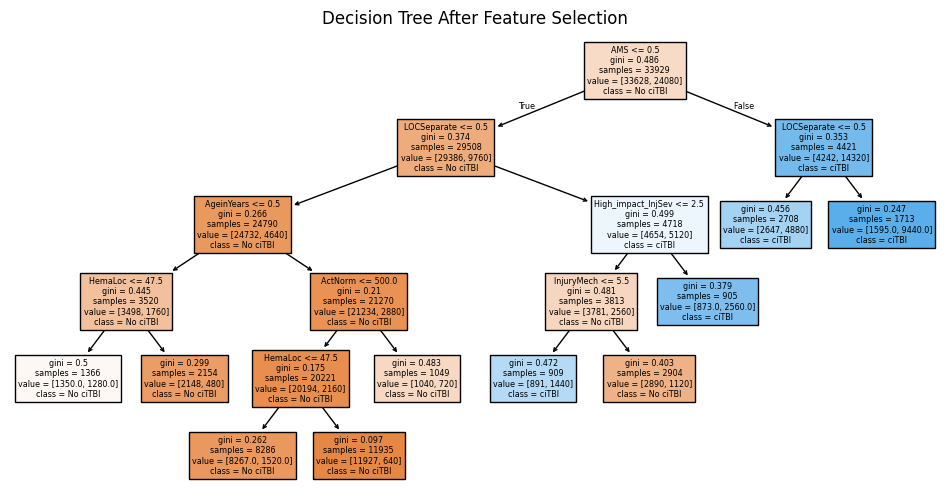

In [38]:
# 5️⃣ Retrain Decision Tree with only selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

tree_selected = DecisionTreeClassifier(max_depth=5, random_state=42, class_weight={0:1, 1:80},
                                       min_samples_leaf=800, min_samples_split=3000)
tree_selected.fit(X_train_selected, y_train)

# 6️⃣ Evaluate the model
y_pred = tree_selected.predict(X_test_selected)

print("\nClassification Report (Final Decision Tree):\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# 🎯 Plot final decision tree
plt.figure(figsize=(12, 6))
plot_tree(tree_selected, feature_names=selected_features, class_names=["No ciTBI", "ciTBI"], filled=True)
plt.title("Decision Tree After Feature Selection")
plt.show()


## Older Patients (>=2 Years)

In [42]:
np.random.seed(42)
# 2️⃣ Split data into features and target
X = data_older.drop(columns=["PosIntFinal", "PatNum"])
y = data_older["PosIntFinal"]

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [43]:
# 3️⃣ Train an initial Decision Tree Classifier
tree = DecisionTreeClassifier(max_depth=10, random_state=42, class_weight={0:1, 1:80})
tree.fit(X_train, y_train)

# Analyze feature importance
feature_importances = pd.DataFrame({"Feature": X.columns, "Importance": tree.feature_importances_})
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)
print("\nFeature Importance (Initial Decision Tree):\n", feature_importances)

# 4️⃣ Select important features using Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight={0:1, 1:80})
rf.fit(X_train, y_train)

selector = SelectFromModel(rf, threshold="mean", prefit=True)  # Select features above the mean importance
selected_features = X.columns[selector.get_support()]
print("\nSelected Features for Final Model:", list(selected_features))


Feature Importance (Initial Decision Tree):
                Feature  Importance
18                 AMS    0.315529
0           InjuryMech    0.080436
3          LOCSeparate    0.072979
22              SFxBas    0.072029
30          AgeinYears    0.063311
1   High_impact_InjSev    0.046068
15           VomitLast    0.044670
10          HASeverity    0.041052
8              ActNorm    0.039781
19             SFxPalp    0.031887
2         Amnesia_verb    0.027659
4               LocLen    0.022377
25            HemaSize    0.019703
13            VomitNbr    0.014640
29               Drugs    0.014432
26                Clav    0.013155
32            Observed    0.012363
9              HA_verb    0.011882
27              NeuroD    0.009605
12               Vomit    0.007628
11             HAStart    0.007603
28                 OSI    0.007269
23                Hema    0.005425
24             HemaLoc    0.005267
17            GCSTotal    0.005168
7              SeizLen    0.004893
6        


Classification Report (Final Decision Tree):
               precision    recall  f1-score   support

         0.0       1.00      0.82      0.90      6283
         1.0       0.04      0.79      0.07        56

    accuracy                           0.81      6339
   macro avg       0.52      0.80      0.48      6339
weighted avg       0.99      0.81      0.89      6339


Accuracy Score: 0.8149550402271651


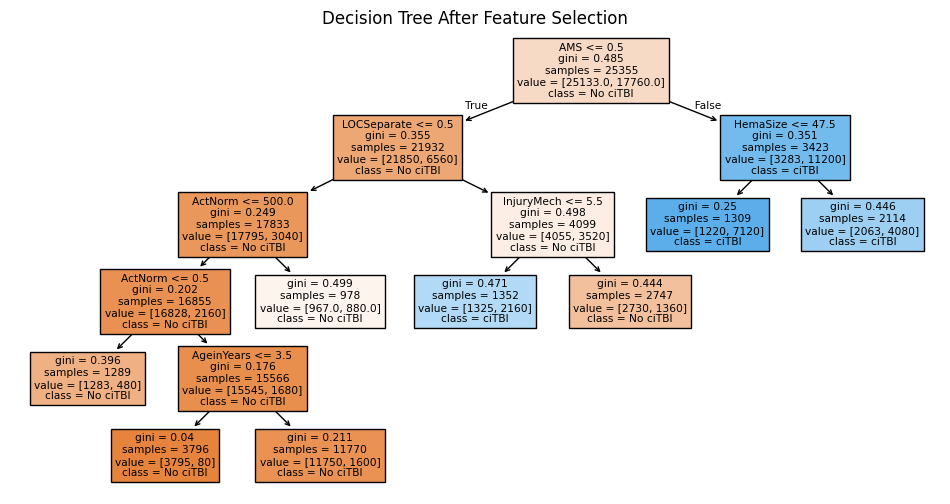

In [44]:
# 5️⃣ Retrain Decision Tree with only selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

tree_selected = DecisionTreeClassifier(max_depth=5, random_state=42, class_weight={0:1, 1:80},
                                       min_samples_leaf=800, min_samples_split=3000)
tree_selected.fit(X_train_selected, y_train)

# 6️⃣ Evaluate the model
y_pred = tree_selected.predict(X_test_selected)

print("\nClassification Report (Final Decision Tree):\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# 🎯 Plot final decision tree
plt.figure(figsize=(12, 6))
plot_tree(tree_selected, feature_names=selected_features, class_names=["No ciTBI", "ciTBI"], filled=True)
plt.title("Decision Tree After Feature Selection")
plt.show()